# About 췌장암 data

췌장암 조기 진단 기준을 마련하는 것이 이번 프로젝트의 목적입니다.
Prealbumin, CA19_9,hLRG1,Age,Sex 변수로 부터 NL,PC를 구분을 하기를 원하는데 지금 보시면 섞여 있는 부분이 보이지요? 그래서 두 단계가 아니라 세단계로 분류를 하고자 하는 것입니다. 
iris데이타 예제코드를 보시고 kmeans방법, fuzzy cmeans 방법을 적용해서 주어진 자료를 3그룹으로 나누어서 실제 두개의 그룹인 경우에서 중복되는 값들을 또 하나의 그룹으로 잘 보냈는지 실제 그룹은 또한 잘 맞추었는지 한번 분석해보시기 바랍니다.
여러가지 그림도 그려보시고 기초 분석을 해보신 후 취지에 맞게 각자 분석해보기 바랍니다. 
 ppt파일에 각자 분석한 부분들을 정리해서 저에게 메일로 보내주기 바랍니다. 자료는 췌장암 데이터이고 2단계로 나누어져 있는 환자를 3단계로 나누고자 하는 실제 프로젝트입니다.
 남자와 여자의 특성이 서로 다르다면 나누어서 해보는 등 여러분 각자의 아이디어로 분석해보기 바랍니다. 기존에 2단계로 나누는 환자를 3그룹으로 분류하고자 한다가 핵심입니다.
 NL에서 PC넘어가는 작은 변화를 캐치할 수 있도록 그 중간 단계를 기준을 정해 놓고자 하는 것이지요.

finaldata_tspark1.csv 파일의 index에서 1이 pc, 0이 nl(Normal)입니다. 앞의 세변수(CA19_9, hLRG1, Prealbumin)는 췌장암에 영향을 준다고 알려진 유전자 입니다. 
각각이 정말 NL과 PC에 다르게 나타나는지 등등 궁금한 것들을 분석과 시각화를 통해 알아보는 것이 데이터 사이언스 입니다.

데이터 설명: 

CA 19-9:

CA 19-9는 일반적으로 췌장암과 관련된 종양 표지자입니다. CA 19-9의 정상 범위는 0 ~ 37U / mL (단위 / 밀리리터)이지만 췌장암 환자는 종종 더 높은 수치를 보입니다. 모든 췌장암이 CA 19-9 수치를 상승시키는 것은 아니며 일부 비 암성 상태 (예 : 췌장염 및 황달)는 높은 CA 19-9 수치를 유발할 수 있습니다. 이것은 진단이 CA 19-9만을 기반으로 할 수 없음을 의미합니다. 
진단이 확정되면 CA 19-9를 사용하여 상태를 모니터링 할 수 있습니다. 의사는 수술 전 또는 화학 요법주기를 시작하기 전에 기준 CA 19-9 수준을 취할 수 있습니다. 수치가 감소하면 일반적으로 치료가 효과가 있음을 나타냅니다. 수준이 상승하면 암이 재발하거나 현재 치료 계획에 더 이상 반응하지 않을 수 있습니다. 예후평가, 치료반응평가 등에는 유용합니다. 가령 CA19-9가 높았던 사람이 췌장암 수술하고 나서 CA19-9가 낮아졌다가, 3년 뒤 다시 CA19-9가 올라갔다면 그 사람은 재발했을 가능성이 매우 높다.

Prealbumin:

Prealbumin 검사는 식단에서 충분한 영양을 섭취하고 있는지 확인하기 위해 자주 사용되던 혈액 검사입니다. 만성 질환이 있기 때문일 수 있습니다. 또는 감염이나 염증이 있거나 외상을 입었기 때문일 수 있습니다. 
이 테스트가 필요한 이유: 의사가 감염, 염증 또는 영양 부족이 있다고 생각하는 경우이 검사가 필요할 수 있습니다. 외상이있는 경우에도 이 검사를 받을 수 있습니다.
낮은 Prealbumin 점수는 영양 평가가 필요할 가능성이 있음을 의미합니다. 낮은 Prealbumin 점수는 또한 간 질환, 염증 또는 조직 사망 (조직 괴사)의 징후 일 수 있습니다. 높은 Prealbumin 점수는 장기 (만성) 신장 질환, 스테로이드 사용 또는 알코올 중독의 징후 일 수 있습니다.
Prealbumin 혈액 검사의 정상적인 결과는 다음과 같습니다. 
성인 : 15 ~ 36 밀리그램 / 데시 리터 (mg / dL) 또는 150 ~ 360 밀리그램 / 리터 (mg / L)

어린이 : 5 일 미만 유아는 6 ~ 21mg / dL, 1 ~ 5 세 어린이는 14 ~ 30mg / dL, 6 ~ 9 세 아동은 15 ~ 33mg / dL, 어린이는 22 ~ 36mg / dL 10 ~ 13 세, 14 ~ 19 세 : 22 ~ 45mg / dL

hLRG1:
참고 https://patentscope.wipo.int/search/ko/detail.jsf;jsessionid=E39D991A8E2058FD0070B7AEDF2558C8.wapp1nC?docId=WO2016060382&tab=PCTDESCRIPTION

췌장암 진단 키트

## 라이브러리 가져오기

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from copy import deepcopy

## loading & preprocessing data 

In [5]:
df = pd.read_csv('finaldata_tspark1.csv')
df.shape

(696, 6)

In [6]:
df["Sex"] = df["Sex"].apply(lambda x: 1 if x == "M" else 0)

In [7]:
df.head(10)

,CA19_9,hLRG1,Prealbumin,index,Age,Sex
0,1.015231,9.922501,12.413737,1,47.0,0
1,6.580916,9.531140,12.438453,1,65.0,1
2,3.747148,10.249047,12.504101,1,47.0,0
3,3.230014,10.060906,12.298469,1,50.0,0
4,3.112626,9.680525,12.479149,1,58.0,1
5,5.016750,11.092152,12.347919,1,72.0,0
6,8.294050,9.897942,12.472429,1,52.0,1
7,3.649099,10.190098,12.708785,1,48.0,0
8,5.976554,10.062600,12.582315,1,72.0,1
9,2.641910,10.163576,12.506473,1,57.0,1


In [88]:
df.tail(10)

,CA19_9,hLRG1,Prealbumin,index,Age,Sex
686,2.818995,9.011170,12.462883,0,68.0,1
687,2.415914,9.690523,12.904406,0,60.0,1
688,2.710713,9.567994,12.823202,0,74.0,0
689,2.001480,9.199775,12.891994,0,61.0,0
690,3.567841,9.029466,12.623466,0,54.0,0
691,0.875469,9.898153,12.762713,0,77.0,0
692,3.683867,10.106277,12.892598,0,53.0,0
693,2.192770,9.623522,12.423761,0,61.0,0
694,2.412336,9.454627,12.614998,0,58.0,0
695,2.109000,9.218328,12.946485,0,58.0,1


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CA19_9      696 non-null    float64
 1   hLRG1       696 non-null    float64
 2   Prealbumin  696 non-null    float64
 3   index       696 non-null    int64  
 4   Age         696 non-null    float64
 5   Sex         696 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 32.8 KB


In [7]:
# 내림차순으로 정리(Age 기준)
df_Age_top = df.sort_values(by = 'Age', ascending = False).head(10) 
df_Age_top

,CA19_9,hLRG1,Prealbumin,index,Age,Sex
23,8.285009,10.269012,12.082774,1,85.0,0
316,1.708378,9.147134,12.582589,1,83.0,1
60,4.844187,11.023039,12.362050,1,82.0,1
323,8.294050,10.310392,12.596492,1,82.0,1
84,3.027231,10.177495,12.883903,1,82.0,1
32,4.100989,9.449562,12.148867,1,81.0,1
608,6.287115,9.911287,11.605322,1,81.0,1
25,6.865265,10.558167,12.148867,1,80.0,1
483,5.637358,10.586589,12.962570,1,80.0,0
425,4.218919,10.163838,12.225483,1,80.0,0


In [8]:
# 오름차순으로 정리(Age 기준)
df_Age_bottom = df.sort_values(by = 'Age', ascending = True).head(10) 
df_Age_bottom

,CA19_9,hLRG1,Prealbumin,index,Age,Sex
489,5.468735,9.805169,12.860895,1,25.0,0
601,5.006092,10.827600,12.221158,1,29.0,0
27,2.408745,9.610733,12.700525,1,34.0,1
486,3.490429,9.882034,13.012138,1,35.0,1
268,6.448256,9.351675,12.512969,1,35.0,1
498,1.911023,10.596072,12.625046,1,36.0,0
92,8.102405,10.116330,12.819744,1,38.0,0
254,4.387512,9.281060,12.478540,1,40.0,1
181,6.959209,11.117511,11.628395,1,40.0,0
21,1.199965,8.919667,13.082874,1,40.0,1


위 데이터의 사람들은 25-85세 이므로 모두 성인이다.

In [9]:
# 내림차순으로 정리(CA19_9 기준)
# CA 19-9의 정상 범위는 0 ~ 37U / mL (단위 / 밀리리터)인데 이 데이터에서는 CA19_9의 최고 수치가 8.29405이다.
# 따라서 모든 사람들이 CA19_9 기준으로는 정상범위에 있다고 할 수 있다.
df_CA19_9_top = df.sort_values(by = 'CA19_9', ascending = False).head(10) 
df_CA19_9_top

,CA19_9,hLRG1,Prealbumin,index,Age,Sex
95,8.29405,10.278693,13.059807,1,58.0,1
307,8.29405,10.586827,12.082774,1,64.0,0
288,8.29405,10.117869,11.950406,1,74.0,0
78,8.29405,11.213817,11.957611,1,65.0,1
77,8.29405,10.603275,12.485218,1,65.0,0
291,8.29405,10.801433,11.945227,1,71.0,0
74,8.29405,10.166256,11.861891,1,64.0,0
293,8.29405,10.211832,12.498145,1,70.0,1
70,8.29405,10.796579,11.830943,1,67.0,1
309,8.29405,11.557727,12.307907,1,43.0,1


In [10]:
# 내림차순으로 정리(hLRG1 기준)
df_hLRG1_top = df.sort_values(by = 'hLRG1', ascending = False).head(10) 
df_hLRG1_top

,CA19_9,hLRG1,Prealbumin,index,Age,Sex
48,5.212106,11.690351,11.225777,1,72.0,1
473,6.542472,11.685850,11.346162,1,51.0,0
573,1.671473,11.602983,12.246062,1,50.0,1
260,5.666150,11.557730,11.378708,1,55.0,0
309,8.294050,11.557727,12.307907,1,43.0,1
54,8.047893,11.539115,11.991393,1,74.0,1
180,4.841980,11.448455,11.222573,1,70.0,0
586,4.841980,11.448455,11.080295,1,73.0,1
225,6.803283,11.421194,11.144756,1,70.0,0
179,3.247269,11.413737,11.997818,1,63.0,1


In [11]:
# 내림차순으로 정리(Prealbumin 기준)
# 성인기준 Prealbumin 혈액 검사의 정상적인 결과 : 15 ~ 36 밀리그램 / 데시 리터 (mg / dL) 또는 150 ~ 360 밀리그램 / 리터 (mg / L)
# 이 데이터의 모든 사람들은 성인이다
# 이 데이터에서 Prealbumin의 최고 수치는 13.600633이다.
# 따라서 이 데이터의 모든 사람들은 Prealbumin 기준으로 비정상범위에 있다. 정확히는 정상수치보다 낮다.
# 즉 모두 영양이 부족한 상태라고 판단된다
df_Prealbumin_top = df.sort_values(by = 'Prealbumin', ascending = False).head(10)   
df_Prealbumin_top

,CA19_9,hLRG1,Prealbumin,index,Age,Sex
393,2.314514,9.330148,13.600633,0,45.0,1
163,0.908259,9.894411,13.565612,0,52.0,1
382,1.175573,9.588051,13.563247,0,51.0,1
523,2.206074,9.766728,13.484225,0,53.0,1
386,3.204371,9.481649,13.465102,0,59.0,1
501,2.423031,9.884763,13.457921,0,64.0,0
160,2.290513,9.530553,13.451149,0,62.0,1
666,2.430098,9.017302,13.426549,0,57.0,0
168,1.928619,9.891997,13.418966,0,47.0,1
156,1.750937,9.635968,13.401449,0,45.0,1


## Missing Value(결측치수)
결측치수가 없으므로 데이터분석을 그대로 진행한다.

In [ ]:
df.isnull()

In [13]:
# 결측치수 zero
null_count = df.isnull().sum()
null_count

CA19_9        0
hLRG1         0
Prealbumin    0
index         0
Age           0
Sex           0
dtype: int64

## 분류 시작

위의 데이터 전처리 과정에서 모든 사람들이 CA19_9 기준으로는 정상범위에 있다는 것을 알았다. 그리고 CA19_9 기준으로는 조기 진단을 하기에 무리가 있다는 결과가 있다.
미국 뉴욕의대 종양내과 전후근 교수팀이 발표한 '암 환자의 식욕부진과 영양상태'(2006)라는 논문을 보면, 췌장암 환자의 영양실조 발생률은 무려 83%에 이른다고 한다. 따라서 Prealbumin 검사의 결과는 췌장암과 연관이 깊을 것이라 판단된다.
따라서 먼저는 hLRG1와 Prealbumin 두 가지 feature만을 고려하도록 한다. 
데이터로부터 두 feature만을 뽑아내어 산점도를 그려보도록 하곘습니다. x축이 hLRG1를, y축이 Prealbumin를 나타냅니다.

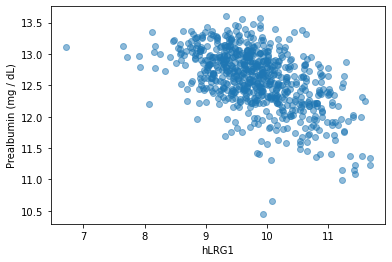

In [14]:
x = df.values[:,1]
y = df.values[:,2]

plt.scatter(x, y, alpha=0.5)
plt.xlabel('hLRG1')
plt.ylabel('Prealbumin (mg / dL)')
plt.show()

### Implementing K-Means ; scikit-learn 라이브러리 사용

####  group1 : hLRG1, Prealbumin 
클러스터링이 전혀 되지 않았다고 판단된다.

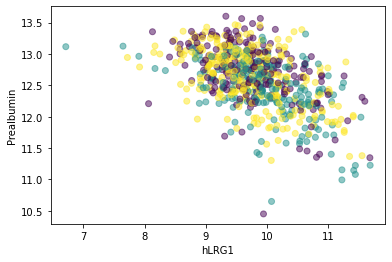

In [20]:
from sklearn.cluster import KMeans

# 3개의 그룹으로 나누는 K-Means 모델을 생성합니다
model = KMeans(n_clusters = 3)
model.fit(df)
labels = model.predict(df)
# 클러스터링 결과를 시각화합니다
x = df.values[:,1]
y = df.values[:,2]

plt.scatter(x, y, c=labels, alpha=0.5)
plt.xlabel('hLRG1')
plt.ylabel('Prealbumin')
plt.show()

####  group2 : hLRG1, CA19_9
클러스터링이 전혀 되지 않았다고 판단된다.

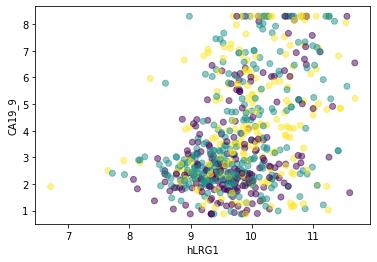

In [21]:
from sklearn.cluster import KMeans

# 3개의 그룹으로 나누는 K-Means 모델을 생성합니다
model = KMeans(n_clusters = 3)
model.fit(df)
labels = model.predict(df)
# 클러스터링 결과를 시각화합니다
x = df.values[:,1]
y = df.values[:,0]

plt.scatter(x, y, c=labels, alpha=0.5)
plt.xlabel('hLRG1')
plt.ylabel('CA19_9')
plt.show()

####  group3 : CA19_9, Prealbumin
클러스터링이 전혀 되지 않았다고 판단된다.

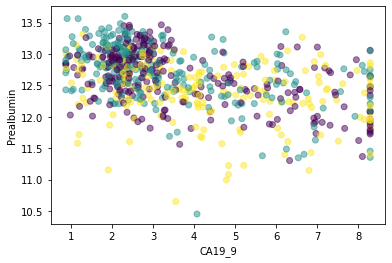

In [22]:
from sklearn.cluster import KMeans

# 3개의 그룹으로 나누는 K-Means 모델을 생성합니다
model = KMeans(n_clusters = 3)
model.fit(df)
labels = model.predict(df)
# 클러스터링 결과를 시각화합니다
x = df.values[:,0]
y = df.values[:,2]

plt.scatter(x, y, c=labels, alpha=0.5)
plt.xlabel('CA19_9')
plt.ylabel('Prealbumin')
plt.show()

#### group4 : hLRG1, Prealbumin, CA19_9

reference ; https://www.kaggle.com/andyxie/k-means-clustering-implementation-in-python

pc와 nl은 어느정도 클러스터링 되었지만 두개(pc, nl)의 그룹인 경우에서 중복되는 값들을 또 하나의 그룹으로 잘 보내는가 라는 이번 프로젝트의 목표는 center들의 위치를 보았을 때 이루지 못했다고 생각한다.

결국 fuzzy를 써서 soft clustring 하는 방법이 이 프로젝트에 가장 알맞은 방법이라고 판단된다.

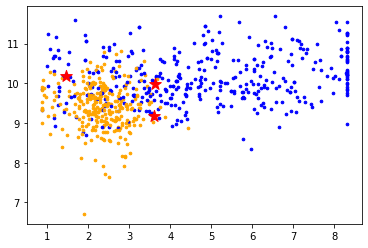

In [8]:
# Change dataframe to numpy matrix
data = df.values[:, 0:3]
category = df.values[:, 3]

# Number of clusters
k = 3
# Number of training data
# data의 행 개수
n = data.shape[0]
# Number of features in the data
# data의 열 개수
c = data.shape[1]

# Generate random centers, here we use sigma and mean to ensure it represent the whole data
mean = np.mean(data, axis = 0)
std = np.std(data, axis = 0)
centers = np.random.randn(k,c)*std + mean

# Plot the data and the centers generated as random
colors=['orange', 'blue', 'green']
for i in range(n):
    plt.scatter(data[i, 0], data[i,1], s=7, color = colors[int(category[i])])
plt.scatter(centers[:,0], centers[:,1], marker='*', c='r', s=150)

In [9]:
centers_old = np.zeros(centers.shape) # to store old centers
centers_new = deepcopy(centers) # Store new centers

data.shape
clusters = np.zeros(n)
distances = np.zeros((n,k))

error = np.linalg.norm(centers_new - centers_old)

# When, after an update, the estimate of that center stays the same, exit loop
while error != 0:
    # Measure the distance to every center
    for i in range(k):
        distances[:,i] = np.linalg.norm(data - centers[i], axis=1)
    # Assign all training data to closest center
    clusters = np.argmin(distances, axis = 1)
    
    centers_old = deepcopy(centers_new)
    # Calculate mean for every cluster and update the center
    for i in range(k):
        centers_new[i] = np.mean(data[clusters == i], axis=0)
    error = np.linalg.norm(centers_new - centers_old)
centers_new    

array([[ 1.87053337,  9.69787691, 12.78573539],
       [ 5.21906781, 10.2506126 , 12.40985188],
       [ 3.48794584,  9.0713875 , 12.71484558]])

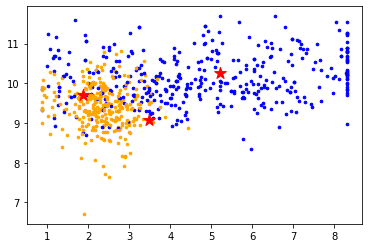

In [12]:
# Plot the data and the centers generated as random
colors=['orange', 'blue', 'green']
for i in range(n):
    plt.scatter(data[i, 0], data[i,1], s=7, color = colors[int(category[i])])
plt.scatter(centers_new[:,0], centers_new[:,1], marker='*', c='r', s=150)

## Implementing fuzzy C means

1. 군집의 개수 K를 선택함

2. 각 관측치가 특정 군집에 속할 가중치
  (가능성) 값을 무작위로 할당함

3. Repeat

 - 각 군집의 중심을 계산함

 - 각 관측치에 대해 특정 군집에 속할
  가중치(가능성) 값을 다시 계산함

4. until

 알고리즘이 수렴할 때까지 반복함

 (즉, 3번의 2개 반복에서 더이상 가중치 값의
 변화가 주어진 민감도 기준치 미만일 때)
 
 reference ; https://rfriend.tistory.com/230, https://www.kaggle.com/prateekk94/fuzzy-c-means-clustering-on-iris-dataset, 
 https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_cmeans.html, http://eneskemalergin.github.io/blog//blog/Fuzzy_Clustering/

### fuzzy를 이용한 시각화 1
확실히 k-means 보다는 3가지의 그룹으로 잘 나누어지는 것을 확인할 수 있다.

#### CA19_9, hLRG1 

3개의 그룹으로 잘 분류된다

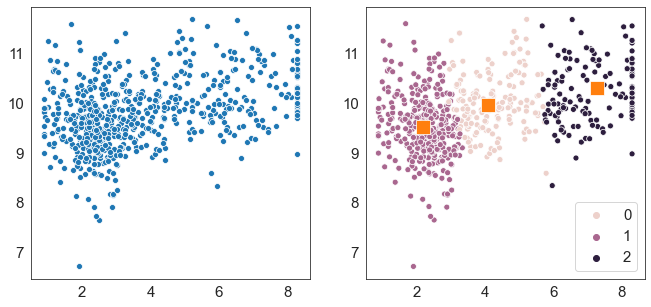

In [97]:
from fcmeans import FCM
from matplotlib import pyplot as plt
from seaborn import scatterplot as scatter

# data

data = df.values[:, 0:3]
category = df.values[:, 3]

# fit the fuzzy-c-means
fcm = FCM(n_clusters=3)
fcm.fit(data)

# outputs
fcm_centers = fcm.centers
fcm_labels  = fcm.u.argmax(axis=1)


# plot result
# axes[] 설명 ; https://nittaku.tistory.com/117
# ax=axes[0] 가 의미하는 바를 정확히 알자
%matplotlib inline
f, axes = plt.subplots(1, 2, figsize=(11,5))
scatter(data[:,0], data[:,1], ax=axes[0])
scatter(data[:,0], data[:,1], ax=axes[1], hue=fcm_labels)
scatter(fcm_centers[:,0], fcm_centers[:,1], ax=axes[1],marker="s",s=200)
plt.show()

#### CA19_9, Prealbumin

3개의 그룹으로 잘 분류된다

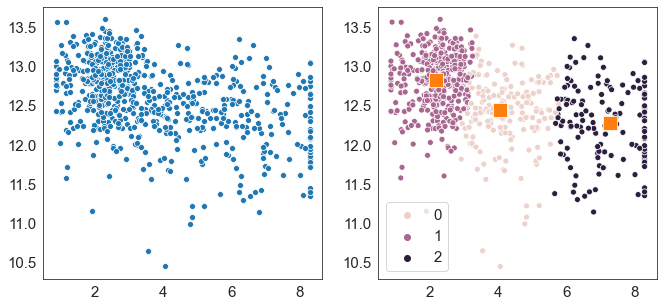

In [92]:
from fcmeans import FCM
from matplotlib import pyplot as plt
from seaborn import scatterplot as scatter

# data

data = df.values[:, 0:3]
category = df.values[:, 3]

# fit the fuzzy-c-means
fcm = FCM(n_clusters=3)
fcm.fit(data)

# outputs
fcm_centers = fcm.centers
fcm_labels  = fcm.u.argmax(axis=1)


# plot result
# axes[] 설명 ; https://nittaku.tistory.com/117
%matplotlib inline
f, axes = plt.subplots(1, 2, figsize=(11,5))
scatter(data[:,0], data[:,2], ax=axes[0])
scatter(data[:,0], data[:,2], ax=axes[1], hue=fcm_labels)
scatter(fcm_centers[:,0], fcm_centers[:,2], ax=axes[1],marker="s",s=200)
plt.show()

#### hLRG1, Prealbumin

분류가 잘 되지 않았다, 내 예상과는 다르게 이 두개의 feature들이 가장 분류를 잘 하지 못하였다.

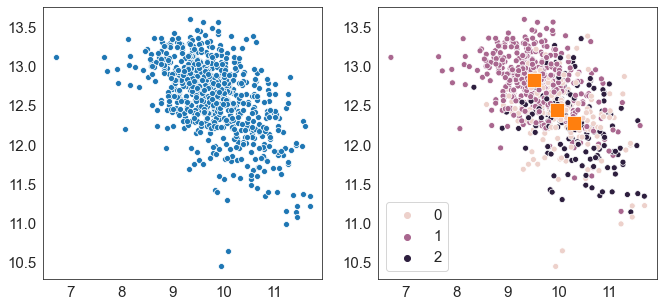

In [93]:
from fcmeans import FCM
from matplotlib import pyplot as plt
from seaborn import scatterplot as scatter

# data

data = df.values[:, 0:3]
category = df.values[:, 3]

# fit the fuzzy-c-means
fcm = FCM(n_clusters=3)
fcm.fit(data)

# outputs
fcm_centers = fcm.centers
fcm_labels  = fcm.u.argmax(axis=1)


# plot result
# axes[] 설명 ; https://nittaku.tistory.com/117
%matplotlib inline
f, axes = plt.subplots(1, 2, figsize=(11,5))
scatter(data[:,1], data[:,2], ax=axes[0])
scatter(data[:,1], data[:,2], ax=axes[1], hue=fcm_labels)
scatter(fcm_centers[:,1], fcm_centers[:,2], ax=axes[1],marker="s",s=200)
plt.show()

### fuzzy를 이용한 시각화 2(아직 완성 못함)

#### Loading modules and training data

In [1]:
import pandas as pd # reading all required header files
import numpy as np
import random
import operator
import math
import matplotlib.pyplot as plt 
from scipy.stats import multivariate_normal 

In [2]:
df_full = pd.read_csv("finaldata_tspark1.csv")
df_full.head()

,CA19_9,hLRG1,Prealbumin,index,Age,Sex
0,1.015231,9.922501,12.413737,1,47.0,F
1,6.580916,9.531140,12.438453,1,65.0,M
2,3.747148,10.249047,12.504101,1,47.0,F
3,3.230014,10.060906,12.298469,1,50.0,F
4,3.112626,9.680525,12.479149,1,58.0,M


In [3]:
columns = list(df_full.columns)
features = columns[:len(columns)-3]
#class_labels = list(df_full[columns[-3]])
#df = df_full[features]
features

['CA19_9', 'hLRG1', 'Prealbumin']

#### Defining parameters

In [41]:
# Number of Clusters
k = 3
# Maximum number of iterations
MAX_ITER = 100
# Number of data points
n = len(df)
# Fuzzy parameter
m = 1.7 #Select a value greater than 1 else it will be knn

#### Scatter Plots

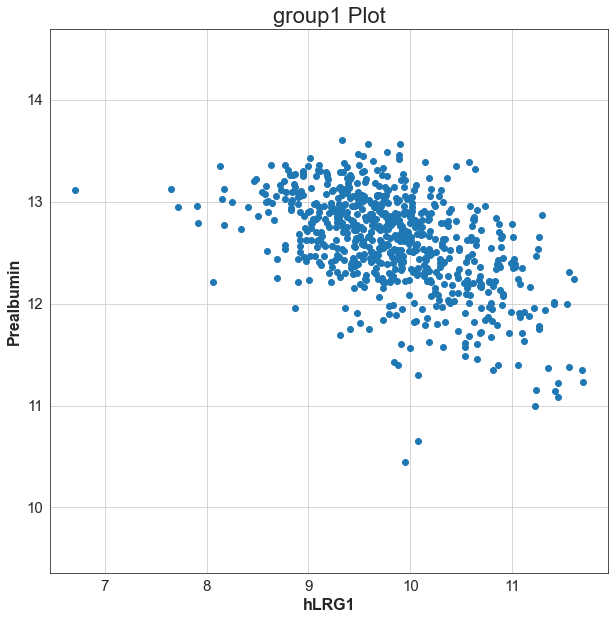

In [42]:
plt.figure(figsize=(10,10))                #scatter plot of hLRG1 vs Prealbumin                        
plt.scatter(list(df.iloc[:,1]), list(df.iloc[:,2]), marker='o')       
plt.axis('equal')                                                                 
plt.xlabel('hLRG1', fontsize=16)                                                 
plt.ylabel('Prealbumin', fontsize=16)                                                 
plt.title('group1 Plot', fontsize=22)                                            
plt.grid()                                                                         
plt.show()

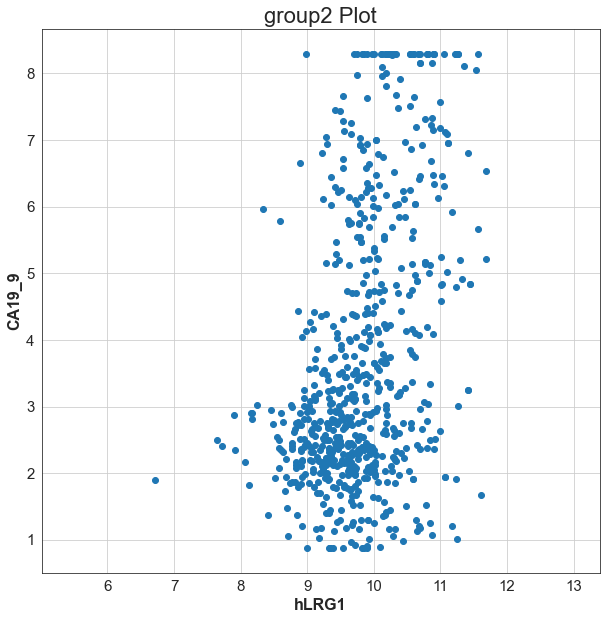

In [43]:
plt.figure(figsize=(10,10))                #scatter plot of hLRG1 vs CA19_9                     
plt.scatter(list(df.iloc[:,1]), list(df.iloc[:,0]), marker='o')       
plt.axis('equal')                                                                 
plt.xlabel('hLRG1', fontsize=16)                                                 
plt.ylabel('CA19_9', fontsize=16)                                                 
plt.title('group2 Plot', fontsize=22)                                            
plt.grid()                                                                         
plt.show()

#### Initialize membership matrix

In [44]:
def initializeMembershipMatrix(): # initializing the membership matrix
    membership_mat = []
    for i in range(n):
        random_num_list = [random.random() for i in range(k)]
        summation = sum(random_num_list)
        temp_list = [x/summation for x in random_num_list]
        
        flag = temp_list.index(max(temp_list))
        for j in range(0,len(temp_list)):
            if(j == flag):
                temp_list[j] = 1
            else:
                temp_list[j] = 0
        
        membership_mat.append(temp_list)
    return membership_mat

In [45]:
membership_mat = initializeMembershipMatrix()

#### Calculating Cluster Center

In [46]:
def calculateClusterCenter(membership_mat): # calculating the cluster center
    cluster_mem_val = list(zip(*membership_mat))
    cluster_centers = []
    for j in range(k):
        x = list(cluster_mem_val[j])
        xraised = [p ** m for p in x]
        denominator = sum(xraised)
        temp_num = []
        for i in range(n):
            data_point = list(df.iloc[i])
            prod = [xraised[i] * val for val in data_point]
            temp_num.append(prod)
        numerator = map(sum, list(zip(*temp_num)))
        center = [z/denominator for z in numerator]
        cluster_centers.append(center)
    return cluster_centers

In [47]:
#cluster_centers = calculateClusterCenter(membership_mat)
calculateClusterCenter(membership_mat)

[[3.715224127810715, 9.830713596626758, 12.591179849406934],
 [3.723123943784599, 9.829853757999324, 12.60638826685737],
 [3.7841090675970674, 9.777455973370824, 12.602000023574956]]

#### Updating Membership Value

In [48]:
def updateMembershipValue(membership_mat, cluster_centers): # Updating the membership value
    p = float(2/(m-1))
    for i in range(n):
        x = list(df.iloc[i])
        distances = [np.linalg.norm(np.array(list(map(operator.sub, x, cluster_centers[j])))) for j in range(k)]
        for j in range(k):
            den = sum([math.pow(float(distances[j]/distances[c]), p) for c in range(k)])
            membership_mat[i][j] = float(1/den)       
    return membership_mat

#### Getting the clusters

In [49]:
def getClusters(membership_mat): # getting the clusters
    cluster_labels = list()
    for i in range(n):
        max_val, idx = max((val, idx) for (idx, val) in enumerate(membership_mat[i]))
        cluster_labels.append(idx)
    return cluster_labels

#### Fuzzy C-Means with cluster centres at the origin

In [50]:
def fuzzyCMeansClustering(): #First Iteration with centers at 0
    # Membership Matrix
    membership_mat = initializeMembershipMatrix()
    curr = 0
    acc=[]
    cent_temp = [[0, 0, 0, 0],[0, 0, 0, 0],[0, 0, 0, 0]]
    while curr < MAX_ITER:
        if(curr == 0):
            cluster_centers = cent_temp
            print("Cluster Centers:")
            print(np.array(cluster_centers))
        else:
            cluster_centers = calculateClusterCenter(membership_mat)
        #cluster_centers = calculateClusterCenter(membership_mat)
        membership_mat = updateMembershipValue(membership_mat, cluster_centers)
        cluster_labels = getClusters(membership_mat)
        acc.append(cluster_labels)
        curr += 1
    print("---------------------------")
    print("Membership Matrix:")
    print(np.array(membership_mat))
    return cluster_labels, cluster_centers, acc

#### Fuzzy C-Means with with cluster centers at random locations within a multi-variate Gaussian distribution with zero-mean and unit-variance

In [51]:
def fuzzyCMeansClustering(): #Second Iteration Multivariate Gaussian
    # Membership Matrix
    membership_mat = initializeMembershipMatrix()
    curr = 0
    acc=[]
    mean = [0, 0]
    cov = [[1, 0], [0, 1]]
    
    lis1,cent_temp=[],[]
    
    for i in range(0,k):
        Z = list(np.random.multivariate_normal(mean, cov))
        Z1 = list(np.random.multivariate_normal(mean, cov))
        lis1 = Z+Z1
        cent_temp.append(lis1)
    
    
    while curr < MAX_ITER:
        if(curr == 0):
            cluster_centers = cent_temp
            print("Cluster Centers:")
            print(np.array(cluster_centers))
        else:
            cluster_centers = calculateClusterCenter(membership_mat)
        #cluster_centers = calculateClusterCenter(membership_mat)
        membership_mat = updateMembershipValue(membership_mat, cluster_centers)
        cluster_labels = getClusters(membership_mat)
        acc.append(cluster_labels)
        curr += 1
    print("---------------------------")
    print("Membership Matrix:")
    print(np.array(membership_mat))
    return cluster_labels, cluster_centers, acc

#### Fuzzy C-Means with cluster centers at random vectors chosen from the data.

In [52]:
def fuzzyCMeansClustering(): #Third iteration Random vectors from data
    # Membership Matrix
    membership_mat = initializeMembershipMatrix()
    curr = 0
    acc=[]
    while curr < MAX_ITER:
        cluster_centers = calculateClusterCenter(membership_mat)
        membership_mat = updateMembershipValue(membership_mat, cluster_centers)
        cluster_labels = getClusters(membership_mat)
        
        acc.append(cluster_labels)
        
        if(curr == 0):
            print("Cluster Centers:")
            print(np.array(cluster_centers))
        curr += 1
    print("---------------------------")
    print("Partition matrix:")
    print(np.array(membership_mat))
    #return cluster_labels, cluster_centers
    return cluster_labels, cluster_centers, acc

#### Plotting the data

In [77]:
group1_df = df_full.iloc[:,1:3]
group1_df = np.array(group1_df)

In [78]:
#First initialization
#m1 = [0,0]
#m2 = [0,0]
#m3 = [0,0]
#Second initialization
#m1 = [-0.47534495, -0.16392118]
#m2 = [0.89019389, -1.19440781]
#m3 = [1.29107135, 0.48248487]
#Third initialization
m1 = random.choice(group1_df)
m2 = random.choice(group1_df)
m3 = random.choice(group1_df)

cov1 = np.cov(np.transpose(group1_df))
cov2 = np.cov(np.transpose(group1_df))
cov3 = np.cov(np.transpose(group1_df))

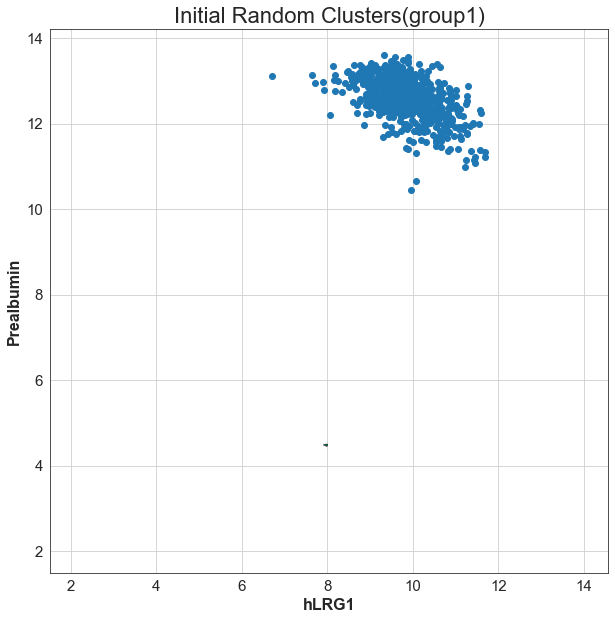

In [80]:
x1 = np.linspace(4,8,150)  
x2 = np.linspace(1.5,4.5,150)
#x1 = np.linspace(-1,8,150)  
#x2 = np.linspace(-1,4.5,150)
X, Y = np.meshgrid(x1,x2) 

Z1 = multivariate_normal(m1, cov1)  
Z2 = multivariate_normal(m2, cov2)
Z3 = multivariate_normal(m3, cov3)

pos = np.empty(X.shape + (2,))                # a new array of given shape and type, without initializing entries
pos[:, :, 0] = X; pos[:, :, 1] = Y   

plt.figure(figsize=(10,10))                                                          # creating the figure and assigning the size
plt.scatter(group1_df[:,0], group1_df[:,1], marker='o')     
plt.contour(X, Y, Z1.pdf(pos), colors="r" ,alpha = 0.5) 
plt.contour(X, Y, Z2.pdf(pos), colors="b" ,alpha = 0.5) 
plt.contour(X, Y, Z3.pdf(pos), colors="g" ,alpha = 0.5) 
plt.axis('equal')                                                                  # making both the axis equal
plt.xlabel('hLRG1', fontsize=16)                                                  # X-Axis
plt.ylabel('Prealbumin', fontsize=16)                                                  # Y-Axis
plt.title('Initial Random Clusters(group1)', fontsize=22)                                            # Title of the plot
plt.grid()                                                                         # displaying gridlines
plt.show()

In [ ]:
petal_df = df_full.iloc[:,2:4]
petal_df = np.array(petal_df)

In [ ]:
#first initialization
#m1 = [0,0]
#m2 = [0,0]
#m3 = [0,0]
#second initialization
#m1 = [-0.8005044 , -0.7017542]
#m2 = [-2.17962154, -0.96475807]
#m3 = [-0.68988961,  0.54596565]
#third initialization
m1 = random.choice(petal_df)
m2 = random.choice(petal_df)
m3 = random.choice(petal_df)
cov1 = np.cov(np.transpose(petal_df))
cov2 = np.cov(np.transpose(petal_df))
cov3 = np.cov(np.transpose(petal_df))

In [ ]:
#x1 = np.linspace(0.5,7,150)  
#x2 = np.linspace(-1,4,150)
x1 = np.linspace(-1,7,150)
x2 = np.linspace(-1,4,150)
X, Y = np.meshgrid(x1,x2) 

Z1 = multivariate_normal(m1, cov1)  
Z2 = multivariate_normal(m2, cov2)
Z3 = multivariate_normal(m3, cov3)

pos = np.empty(X.shape + (2,))                # a new array of given shape and type, without initializing entries
pos[:, :, 0] = X; pos[:, :, 1] = Y   

plt.figure(figsize=(10,10))                                                          # creating the figure and assigning the size
plt.scatter(petal_df[:,0], petal_df[:,1], marker='o')     
plt.contour(X, Y, Z1.pdf(pos), colors="r" ,alpha = 0.5) 
plt.contour(X, Y, Z2.pdf(pos), colors="b" ,alpha = 0.5) 
plt.contour(X, Y, Z3.pdf(pos), colors="g" ,alpha = 0.5) 
plt.axis('equal')                                                                  # making both the axis equal
plt.xlabel('Petal Length', fontsize=16)                                                  # X-Axis
plt.ylabel('Petal Width', fontsize=16)                                                  # Y-Axis
plt.title('Initial Random Clusters(Petal)', fontsize=22)                                            # Title of the plot
plt.grid()                                                                         # displaying gridlines
plt.show()

### fuzzy를 이용한 시각화 3

[[0.03545621568279656, 0.1489655603291459, 0.8155782239880576], [0.8138915179947407, 0.13961806966501475, 0.046490412340244494], [0.01419611066806077, 0.9279962900043934, 0.057807599327545756], [0.03034340204658755, 0.6691259204540194, 0.300530677499393], [0.02748619405570631, 0.4851170512146535, 0.4873967547296402], [0.24057771234363864, 0.631245977087368, 0.12817631056899342], [0.9059846256559809, 0.06375804758783266, 0.030257326756186347], [0.01972655925384171, 0.8790124351732421, 0.10126100557291606], [0.6148228374954594, 0.30859001447643597, 0.07658714802810462], [0.024341937665900718, 0.2501491588774887, 0.7255089034566107], [0.036203104352274425, 0.1442928927935243, 0.8195040028542013], [0.027356493003764807, 0.37473896103068766, 0.5979045459655475], [0.47787611040416267, 0.4273121282965439, 0.09481176129929347], [0.09472817153666492, 0.7964044600965241, 0.10886736836681098], [0.027169115798240856, 0.11458588849882614, 0.858244995702933], [0.014987300550537194, 0.911232156272510

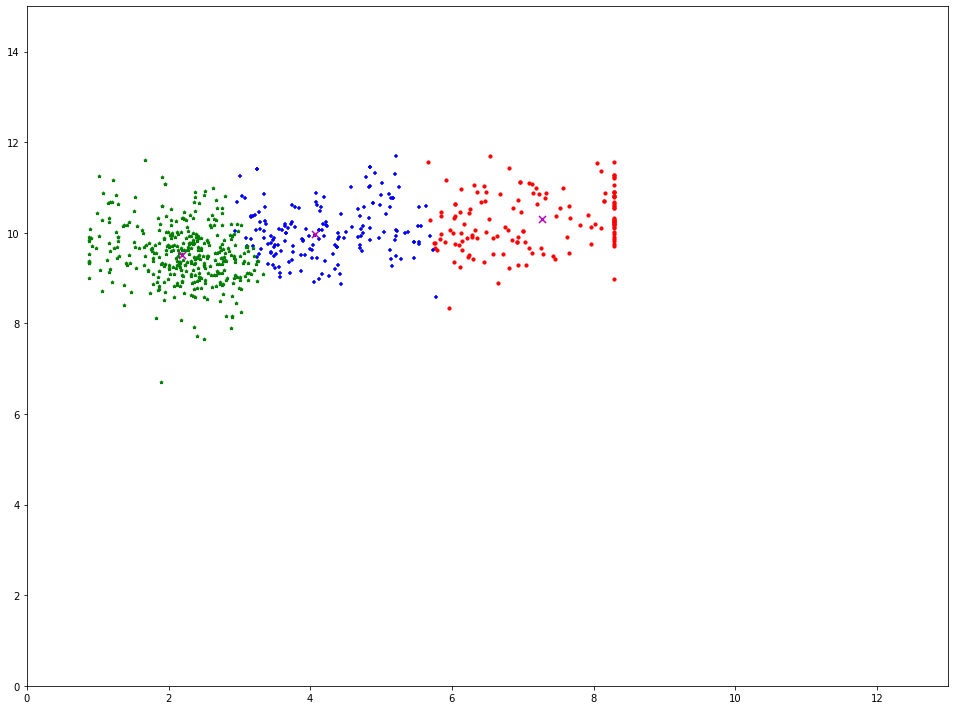

In [18]:
from pylab import *
from numpy import *
import pandas as pd
import numpy as np
import operator
import math
import matplotlib.pyplot as plt
import random



#Data is saved in a .csv file
df_full = pd.read_csv("finaldata_tspark1.csv")
columns = list(df_full.columns)
features = columns[:len(columns)-3]
# class_labels = list(df_full[columns[-1]])
df = df_full[features]
# 
#num_attr = len(df.columns) - 1
# 
k = 3
# Maximum number of iterations
MAX_ITER = 100
# Number of samples
n = len(df)  # the number of row
# fuzzy parameter
m = 2.00


# Initialize the fuzzy matrix U
def initializeMembershipMatrix():
    membership_mat = list()
    for i in range(n):
        random_num_list = [random.random() for i in range(k)]
        summation = sum(random_num_list)
        temp_list = [x / summation for x in random_num_list]  #First normalization
        membership_mat.append(temp_list)
    return membership_mat


# 
def calculateClusterCenter(membership_mat):
    cluster_mem_val = zip(*membership_mat)
    cluster_centers = list()
    cluster_mem_val_list = list(cluster_mem_val)
    for j in range(k):
        x = cluster_mem_val_list[j]
        xraised = [e ** m for e in x]
        denominator = sum(xraised)
        temp_num = list()
        for i in range(n):
            data_point = list(df.iloc[i])
            prod = [xraised[i] * val for val in data_point]
            temp_num.append(prod)
        numerator = map(sum, zip(*temp_num))
        center = [z / denominator for z in numerator]  # Each dimension must be calculated.
        cluster_centers.append(center)
    return cluster_centers


#Update membership
def updateMembershipValue(membership_mat, cluster_centers):
    #    p = float(2/(m-1))
    data = []
    for i in range(n):
        x = list(df.iloc[i])  # Take out each line of data in the file
        data.append(x)
        distances = [np.linalg.norm(list(map(operator.sub, x, cluster_centers[j]))) for j in range(k)]
        for j in range(k):
            den = sum([math.pow(float(distances[j] / distances[c]), 2) for c in range(k)])
            membership_mat[i][j] = float(1 / den)
    return membership_mat, data


# Get cluster results
def getClusters(membership_mat):
    cluster_labels = list()
    for i in range(n):
        max_val, idx = max((val, idx) for (idx, val) in enumerate(membership_mat[i]))
        cluster_labels.append(idx)
    return cluster_labels


def fuzzyCMeansClustering():
    # 
    membership_mat = initializeMembershipMatrix()
    curr = 0
    while curr <= MAX_ITER:  # The maximum number of iterations
        cluster_centers = calculateClusterCenter(membership_mat)
        membership_mat, data = updateMembershipValue(membership_mat, cluster_centers)
        cluster_labels = getClusters(membership_mat)
        curr += 1
    print(membership_mat)
    return cluster_labels, cluster_centers, data, membership_mat


def xie_beni(membership_mat, center, data):
    sum_cluster_distance = 0
    min_cluster_center_distance = inf
    for i in range(k):
        for j in range(n):
            sum_cluster_distance = sum_cluster_distance + membership_mat[j][i] ** 2 * sum(
                power(data[j, :] - center[i, :], 2))  # 
    for i in range(k - 1):
        for j in range(i + 1, k):
            cluster_center_distance = sum(power(center[i, :] - center[j, :], 2))  # Calculate the distance between classes
            if cluster_center_distance < min_cluster_center_distance:
                min_cluster_center_distance = cluster_center_distance
    return sum_cluster_distance / (n * min_cluster_center_distance)


labels, centers, data, membership = fuzzyCMeansClustering()
print(labels)
print(centers)
center_array = array(centers)
label = array(labels)
datas = array(data)

# Xie-Beni cluster validity
print("Cluster validity:", xie_beni(membership, center_array, datas))
xlim(0, 13)
ylim(0, 15)
# 
fig = plt.gcf()
fig.set_size_inches(16.5, 12.5)
f1 = plt.figure(1)
plt.scatter(datas[nonzero(label == 0), 0], datas[nonzero(label == 0), 1], marker='o', color='r', label='0', s=10)
plt.scatter(datas[nonzero(label == 1), 0], datas[nonzero(label == 1), 1], marker='+', color='b', label='1', s=10)
plt.scatter(datas[nonzero(label == 2), 0], datas[nonzero(label == 2), 1], marker='*', color='g', label='2', s=10)
plt.scatter(center_array[:, 0], center_array[:, 1], marker='x', color='m', s=50)
plt.show()


## Implementing Mapper

### 연습용

In [11]:
import sys
try:
    import pandas as pd
except ImportError as e:
    print("pandas is required for this example. Please install with conda or pip  and then try again.")
    sys.exit()

import numpy as np
import sklearn
from sklearn import ensemble
import kmapper as km
import jgraph as jg 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

In [13]:
import plotly.graph_objs as go
from ipywidgets import (HBox, VBox)

In [15]:
# Data - the Wisconsin Breast Cancer Dataset
# https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
df = pd.read_csv('Breast-Cancer-wisconsin-Copy.csv')
feature_names = [c for c in df.columns if c not in ["id", "diagnosis"]]
df["diagnosis"] = df["diagnosis"].apply(lambda x: 1 if x == "M" else 0)
X = np.array(df[feature_names].fillna(0))
y = np.array(df["diagnosis"])

# Create a custom 1-D lens with Isolation Forest
model = ensemble.IsolationForest(random_state=1729)
model.fit(X)
lens1 = model.decision_function(X).reshape((X.shape[0], 1))

# Create another 1-D lens with L2-norm
mapper = km.KeplerMapper(verbose=0)
lens2 = mapper.fit_transform(X, projection="l2norm")

# Combine lenses pairwise to get a 2-D lens i.e. [Isolation Forest, L^2-Norm] lens
lens = np.c_[lens1, lens2]

# Define the simplicial complex
scomplex = mapper.map(lens,
                      X,
                      nr_cubes=15,
                      overlap_perc=0.7,
                      clusterer=sklearn.cluster.KMeans(n_clusters=2,
                                                       random_state=3471))

In [16]:
pl_brewer = [[0.0, '#006837'],
             [0.1, '#1a9850'],
             [0.2, '#66bd63'],
             [0.3, '#a6d96a'],
             [0.4, '#d9ef8b'],
             [0.5, '#ffffbf'],
             [0.6, '#fee08b'],
             [0.7, '#fdae61'],
             [0.8, '#f46d43'],
             [0.9, '#d73027'],
             [1.0, '#a50026']]

In [21]:
color_values = lens [:,0] - lens[:,0].min()
my_colorscale = pl_brewer


def get_mapper_graph(
    simplicial_complex,
    color_values=None,
    color_function_name=None,
    colorscale=None,
    custom_tooltips=None,
    custom_meta=None,
    X=None,
    X_names=None,
    lens=None,
    lens_names=None,):
    
    kmgraph,  mapper_summary, colorf_distribution = get_mapper_graph(scomplex, 
                                                                 color_values,  
                                                                 color_function_name='Distance to x-min', 
                                                                 colorscale=my_colorscale)
    for node in kmgraph['nodes']:
        node['custom_tooltips'] = y[scomplex['nodes'][node['name']]]

In [22]:
bgcolor = 'rgba(10,10,10, 0.9)'
y_gridcolor = 'rgb(150,150,150)'# on a black background the gridlines are set on  grey

In [48]:
def plotly_graph(
    kmgraph,
    graph_layout="kk",
    colorscale=None,
    showscale=True,
    factor_size=3,
    edge_linecolor="rgb(180,180,180)",
    edge_linewidth=1.5,
    node_linecolor="rgb(255,255,255)",
    node_linewidth=1.0,):
    
    plotly_graph_data = plotly_graph(kmgraph, graph_layout='fr', colorscale=my_colorscale, 
                                 factor_size=2.5, edge_linewidth=0.5)
    fw_graph = go.FigureWidget(data=plotly_graph_data, layout=layout)
    
    #Update the fw_graph colorbar, setting its title:
    fw_graph.data[1].marker.colorbar.title = 'dist to<br>x-min'
    
    VBox([fw_graph, HBox([fw_summary, fw_hist])])
    




def node_hist_fig(
    node_color_distribution,
    title="Graph Node Distribution",
    width=400,
    height=300,
    top=60,
    left=25,
    bottom=60,
    right=25,
    bgcolor="rgb(240,240,240)",
    y_gridcolor="white",):
    
    fw_hist = node_hist_fig(colorf_distribution, bgcolor=bgcolor,
                        y_gridcolor=y_gridcolor)
    

def summary_fig(
    mapper_summary,
    width=600,
    height=500,
    top=60,
    left=20,
    bottom=60,
    right=20,
    bgcolor="rgb(240,240,240)",):

    fw_summary = summary_fig(mapper_summary, height=300)
    
    
    
    
    
def plot_layout(
    title="TDA KMapper",
    width=600,
    height=600,
    bgcolor="rgba(255, 255, 255, 1)",
    annotation_text=None,
    annotation_x=0,
    annotation_y=-0.01,
    top=100,
    left=60,
    right=60,
    bottom=60,):
    
    layout = plot_layout(title='Topological network representing the<br>  breast cancer  dataset',  
                     width=620, height=570,
                     annotation_text=get_kmgraph_meta(mapper_summary),  
                     bgcolor=bgcolor)
    fw_graph = go.FigureWidget(data=plotly_graph_data, layout=layout)
    dashboard = hovering_widgets(kmgraph, 
                             fw_graph, 
                             ctooltips=True, # ctooltips = True, because we assigned a label to each 
                                             #cluster member
                             bgcolor=bgcolor,
                             y_gridcolor=y_gridcolor, 
                             member_textbox_width=600)
    breastc_dict = {0: 'benign', 1: 'malignant'}
    tooltips = list(fw_graph.data[1].text) # we perform this conversion because fw.data[1].text is a tuple and we want to update
                                     # the tooltips
    



### 실전

## Clustering 성능 비교
군집화의 경우에는 분류문제와 달리 성능기준을 만들기 어렵다. 심지어는 원래 데이터가 어떻게 군집화되어 있었는지를 보여주는 정답(groundtruth)이 있는 경우도 마찬가지이다. 따라서 다양한 성능기준이 사용되고 있다. 다음의 군집화 성능기준의 예다.

조정 랜드지수(Adjusted Rand Index)
조정 상호정보량 (Adjusted Mutual Information)
실루엣계수 (Silhouette Coefficient)

타깃값이 필요 없는 군집용 지표로 실루엣 계수(silhouette coefficient) 가 있습니다. 그러나 이 지표는 실제로 잘 작동하지 않습니다. 실루엣 점수는 클러스터의 밀집 정도를 계산하는 것으로, 높을수록 좋으며 최대 점수는 1입니다. 밀집된 클러스터가 좋긴 하지만 모양이 복잡할 때는 평가가 잘 들어맞지 않습니다. (원형 클러스터에서 값이 더 높게 나옴)

In [ ]:
from sklearn.metrics.cluster import silhouette_score

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 평균이 0, 분산이 1이 되도록 데이터의 스케일을 조정합니다
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})

# 비교를 위해 무작위로 클러스터 할당을 합니다
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# 무작위 할당한 클러스터를 그립니다
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title("Randomly : {:.2f}".format(
        silhouette_score(X_scaled, random_clusters)))

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
              DBSCAN()]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    # 클러스터 할당과 클러스터 중심을 그립니다
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3,
               s=60, edgecolors='black')
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__, silhouette_score(X_scaled, clusters)))